In [29]:
# This cell imports all necessary modules to analyze the data
import numpy as np
%matplotlib inline
import random
import matplotlib 
import matplotlib.pyplot as plt
from math import  sqrt, pi
import scipy
import scipy.stats as ss
# Sets the style of graphs that will be used
plt.style.use('seaborn-notebook')

In [30]:
# chirps = chirps per minute
# temp = degrees farenheit
chirps = [20, 16, 19.79999924, 18.39999962, 17.10000038, 15.5, 14.69999981, 17.10000038, 15.39999962, 16.20000076, 15, 17.20000076, 16, 17, 14.39999962]
temp = [88.59999847, 71.59999847, 93.30000305, 84.30000305, 80.59999847, 75.19999695, 69.69999695, 82, 69.40000153, 83.30000305, 79.59999847, 82.59999847, 80.59999847, 83.5, 76.30000305]

In [31]:
chirps = np.array(chirps)
temp = np.array(temp)

# 1.1 Linear Regression

**Questions**

1) What is the slope and intercept of a linear fit?

2) Is the data well modeled by a linear fit? Justify with an $R^2$ value and at least one other method.

3) Can we extrapolate the linear fit to temperatures beyond those in the dataset? If so, how far?

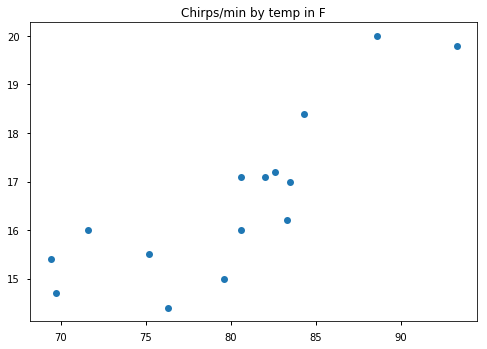

In [32]:
x=temp
y=chirps
plt.title('Chirps/min by temp in F')
plt.plot(x,y,'o')
plt.show()

### From Lecture 12.1 

We will assume our data can be modeled by the following linear equation:

$$\hat{y} = \hat{\alpha} + \hat{\beta}x$$

From the notes, we also see that:

$$\hat{\beta} = \frac{\sigma_{xy}}{\sigma_x^2}$$
where $\sigma_{xy}$ is the sample covariance of $x$ and $y$ and $\sigma_x^2$ is the sample variance of $x$.

To find the intercept, you can just take the average of the residuals (not their squares!) given the model so far:

$$\hat{\alpha} = \frac{1}{N}\sum_i (y_i - \hat{\beta}x_i)$$

In [33]:
#Find beta and alphaof the dataset using  above equations
'''Helpful commands:
    np.cov() will give covariance matrix
    np.mean() will effectively summate and divide by N'''
cov=np.cov(x,y,ddof=2) #x,y
s_xy=cov[0,1]
s_xx=cov[0,0]
beta_hat=s_xy/s_xx
print('beta_hat', beta_hat)
alpha_hat=np.mean(y-(beta_hat*x))
print('alpha_hat =',alpha_hat)
#evry degree increase 0.2111 chirp increase per min


beta_hat 0.21192497833682786
alpha_hat = -0.30914189818078747


$$\hat{y} = 0.21.x -0.309$$

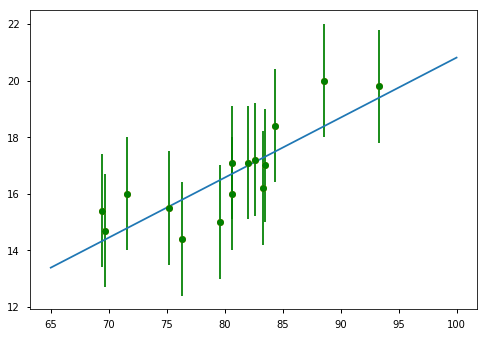

In [34]:
# r is between -1 to 1
x_base= np.array([65,100])
plt.plot(x_base,0.212*x_base-0.39)
plt.plot(x,y,'o')
plt.errorbar(x,y,yerr=2,fmt='go',capthick=1)
plt.show()

### shapiro test
come up with the null hypothesis

Find the difference/residuals of the true data and predicted linear fit

Run a Shapiro Wilks test

ss.shapiro(data)
The first value is the test statistic,second is the p-value

In [35]:
# we can find that we are confident that this dta is not normal but cant fully say that it is. cant fully prove in statistics


Null: Normally distributed residuals
    
Alternative: Not normally distributed

In [36]:
#first find residuals
# Run shapiro wilks
#Get p-value
#make conclusion

differences=y-(alpha_hat+x*beta_hat)
print(ss.shapiro(differences))

(0.9631986618041992, 0.7477710247039795)


p-value is about 0.75>>0.05 differences may be normally distributed

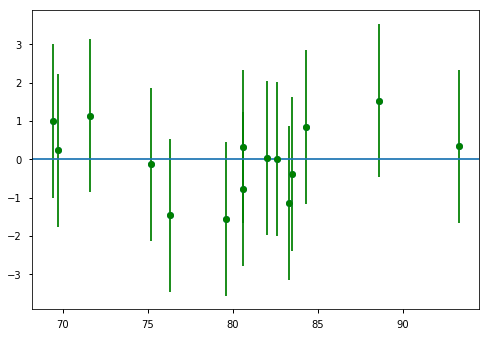

In [37]:
plt.plot(x,differences,'o')
plt.errorbar(x,differences,yerr=2,fmt='go',capthick=1)
plt.axhline(y=0)
plt.show()
#the linear seems appropriate because the data is randomly distributed across the line

In [38]:
ssr=np.sum((differences)**2)
tss=np.sum((np.mean(y)-y)**2)
r_squared=1-(ssr/tss)
print('R2=',r_squared,'and r=',np.sqrt(r_squared))
# if r is negative add a negative sign
# R2
#0.7 good fit
#0.3 okay fit
#less than 0.3 bad fit

R2= 0.6974651450167396 and r= 0.8351437870311552


In [39]:
len(x)

15

In [40]:
#standard deviation
#standard error
#run T-test
#Remember that degrees of freedom is (N-number of variables)

N=len(x)

var=np.sum((y-(alpha_hat+x*beta_hat))**2)/N
std_dev=np.sqrt(var)
std_error_beta= std_dev/np.sum((x-np.mean(x))**2)
T=ss.t.ppf(0.975,N-2)
lower=beta_hat-T*std_error_beta
upper=beta_hat+T*std_error_beta
print('confidence interval of beta_hata ranges from',lower,'to',upper,'with 95% confidence')

confidence interval of beta_hata ranges from 0.20882272652877054 to 0.21502723014488517 with 95% confidence


In [41]:
#1.3
#how far can we extrapolate
#this data doesnt hold at zero degree because chirps will be dead
#here is no such thing as -0.319 per chirp
#use the equation found by changing difference values of x and see if it makes sense.
#the further you are from the the data the more uncertain you are for your extrapolation


# 1.2 Nonlinear Fit

The data below shows the temperature of a hot cup of coffee versus time in minutes.

In [28]:
time = [0, 5, 8, 11, 15, 18, 22, 25, 30, 34, 38, 42, 45, 50]
heat = [179.5, 168.7, 158.1, 149.2, 141.7, 134.6, 125.4, 123.5, 116.3, 113.2, 109.1, 105.7, 102.2, 100.5]

time = np.array(time)
heat = np.array(heat)

In [51]:
x=time
y=heat

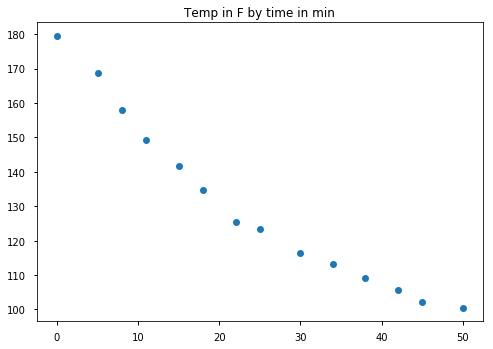

In [52]:
plt.plot(x,y,'o')
plt.title('Temp in F by time in min')
plt.show()
#use scatter plots

In [53]:
#Find beta and alphaof the dataset using  above equations
'''Helpful commands:
    np.cov() will give covariance matrix
    np.mean() will effectively summate and divide by N'''
cov=np.cov(x,y,ddof=2) #x,y
s_xy=cov[0,1]
s_xx=cov[0,0]
beta_hat=s_xy/s_xx
print('beta_hat', beta_hat)
alpha_hat=np.mean(y-(beta_hat*x))
print('alpha_hat =',alpha_hat)
 


beta_hat -1.563715998155832
alpha_hat = 168.86104195481786


$$\hat{y}=168.8-1.56x$$

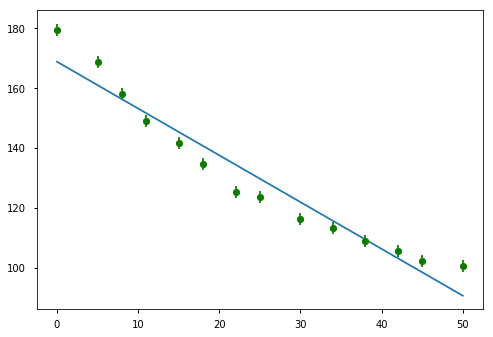

In [74]:
x_base= np.array([0,50])
plt.plot(x_base,-1.5637*x_base+168.86)
plt.plot(x,y,'o')
plt.errorbar(x,y,yerr=2,fmt='go',capthick=1)
plt.show()

In [55]:
differences=y-(alpha_hat+x*beta_hat)
print(ss.shapiro(differences))

(0.9424723982810974, 0.4509190618991852)


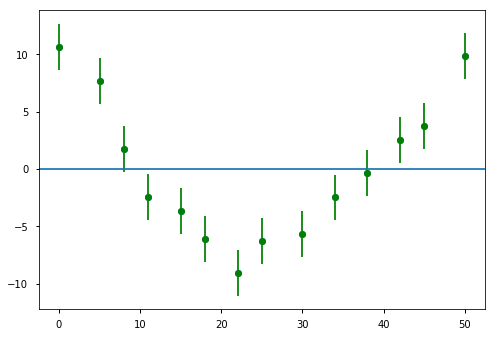

In [56]:
plt.plot(x,differences,'o')
plt.errorbar(x,differences,yerr=2,fmt='go',capthick=1)
plt.axhline(y=0)
plt.show()
#if u then linear fit is wrong

In [57]:
ssr=np.sum((differences)**2)
tss=np.sum((np.mean(y)-y)**2)
r_squared=1-(ssr/tss)
print('R2=',r_squared,'and r=',np.sqrt(r_squared))
#even tho R2 is big it is misleading so suggest another lime

R2= 0.9399494816907316 and r= 0.9695099183044656


$$T(t)=T_a+(T_o-T_a)\times e^{-kt}$$ <br>

whether Ta is atmosper and To is body temperature

In [62]:
def obj(Constants,x,y):
    T_a=Constants[0]
    T_o=Constants[1]
    k=Constants[2]
    yhat=T_a+(T_o-T_a)*np.exp(-k*x)
    residuals=y-yhat
    SSR=np.sum((residuals**2))
    
    return SSR
result=scipy.optimize.minimize(obj,x0=[90,180,.1],args=(x,y)) #play around with te numbers to get the best 
print(result)


      fun: 26.356886369283863
 hess_inv: array([[1.93775755e+00, 5.79528878e-01, 1.56180479e-03],
       [5.79528878e-01, 2.65713329e-01, 5.09737113e-04],
       [1.56180479e-03, 5.09737113e-04, 1.32972935e-06]])
      jac: array([ 4.76837158e-07,  0.00000000e+00, -3.38554382e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 422
      nit: 20
     njev: 82
   status: 2
  success: False
        x: array([8.35240071e+01, 1.81725304e+02, 3.59206101e-02])


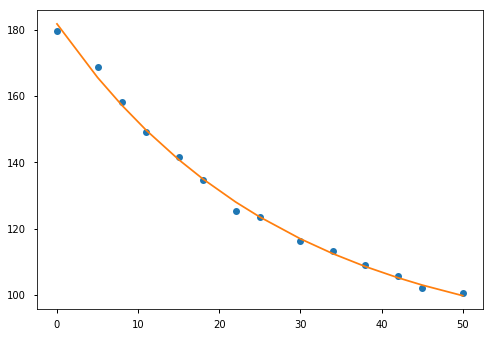

In [64]:
plt.plot(x,y,'o')
Ta=result.x[0]
To=result.x[1]
k=result.x[2]

plt.plot(x,Ta+(To-Ta)*np.exp(-k*x))
plt.show()

In [66]:
#first find residuals
# Run shapiro wilks
#Get p-value
#make conclusion

differences=y-(Ta+(To-Ta)*np.exp(-k*x))
print(ss.shapiro(differences))

(0.9363452792167664, 0.37350285053253174)


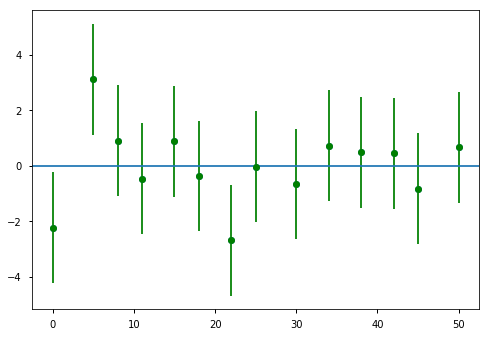

In [67]:
plt.plot(x,differences,'o')
plt.errorbar(x,differences,yerr=2,fmt='go',capthick=1)
plt.axhline(y=0)
plt.show()

In [70]:
ssr=np.sum((differences)**2)
tss=np.sum((np.mean(y)-y)**2)
r_squared=1-(ssr/tss)
print('R2=',r_squared) # r doesnt existfor non linear fits #add negative because graph is going down

R2= 0.9968859036383719


In [ ]:
actual=y
#predicted is based on equation
y_hat=Ta-(Ta-To)*np.exp(-kx)


# Method of Analysis

Residuals: Are they randomly distributed , or do they follow a pattern ? <br>
Are they normally distributed(Shapiro Wilks)
R and R squared: What are the values? How do they compare ti similar data<br>
Does it make sense tha tthe data follows a regression?<br>


Now, we will conduct a regression on the following data. We will first do a linear regression, then after attempt a non-linear regression.

1) Conduct a linear regression

2) Assess the goodness of fit

3) Develop a model equation to fit the data non-linearly

4) Write a function to solve for those parameters

5) Assess goodness of fit